# **3.1 Spaces of Vectors**

**Definition:**  
The space $\mathbb{R}^n$ consists of all column vectors $v$ with $n$ real components.

- Any two vectors in $\mathbb{R}^n$ can be added.  
- Any vector $v$ can be multiplied by any scalar $c$.  
- A **real vector space** is a set of vectors with rules for addition and scalar multiplication.  
- These operations must stay inside the space and satisfy the eight vector space axioms.

**Examples of Vector Spaces (other than $\mathbb{R}^n$)**

- $M$: the vector space of all real $2 \times 2$ matrices  
- $F$: the vector space of all real functions $f(x)$  
- $Z$: the zero vector space containing only the zero vector  

In $M$, the “vectors” are matrices.  
In $F$, the “vectors” are functions.  
In $Z$, the only operation is $0 + 0 = 0$ and $c \cdot 0 = 0$.

- $Z$ is **zero-dimensional**.  
- Every vector space must include its own zero vector: zero matrix, zero function, $(0,0,0)$ in $\mathbb{R}^3$, etc.

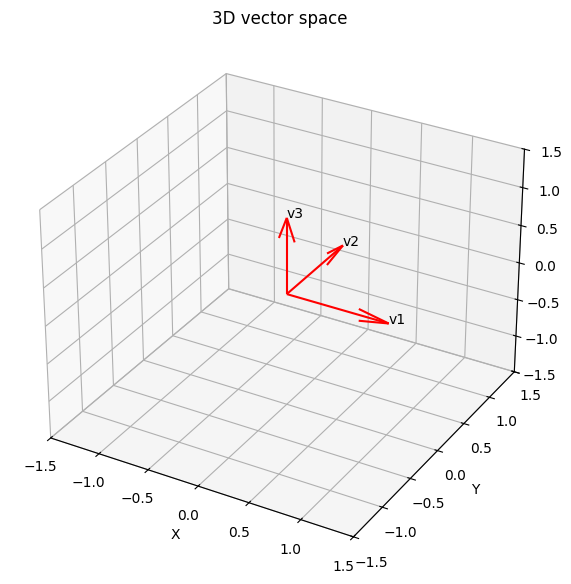

3

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_vectors(vectors, labels=None, dimension=None):
    """
    Params:
        vectors (list or np.ndarray): List of vectors (shape: mxn)
        labels (list): Optional list of labels for each vectors
        dimension(int): Dimension to visualize
    """
    vectors = np.array(vectors)
    n_vectors, n_dim = vectors.shape
    dimension = dimension or n_dim

    if dimension > 3:
        print("Warning: Visualization limited to 3D")
    if dimension == 1:
        plt.figure(figsize=(6, 1))
        plt.scatter(vectors[:, 0], np.zeros(n_vectors), c='r', s=100)
        for i, v in enumerate(vectors):
            if labels:
                plt.text(v[0], 0.02, labels[i])
        plt.xlabel("X")
        plt.yticks([])
        plt.title("1D vector space")
        plt.grid(True)
        plt.show()

    elif dimension == 2:
        plt.figure(figsize=(6, 6))
        plt.axhline(0, color='k')
        plt.axvline(0, color='k')
        for i, v in enumerate(vectors):
            plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r')
            if labels:
                plt.text(v[0], v[1], labels[i])
        plt.xlim(-1.5*np.max(np.abs(vectors)), 1.5*np.max(np.abs(vectors)))
        plt.ylim(-1.5*np.max(np.abs(vectors)), 1.5*np.max(np.abs(vectors)))
        plt.grid(True)
        plt.title("2D vector space")
        plt.show()

    elif dimension == 3:
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        max_range = np.max(np.abs(vectors)) * 1.5
        for i, v in enumerate(vectors):
            ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', length=1, normalize=True)
            if labels:
                ax.text(v[0], v[1], v[2], labels[i])
        ax.set_xlim([-max_range, max_range])
        ax.set_ylim([-max_range, max_range])
        ax.set_zlim([-max_range, max_range])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.title("3D vector space")
        plt.show()

    return dimension


vectors = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
labels = ['v1', 'v2', 'v3']
visualize_vectors(vectors, labels)

### **Subspaces**

**Definition:**  
A subspace of a vector space is a set of vectors (including $0$) satisfying:

1. If $v$ and $w$ are in the subspace, then $v + w$ is in the subspace.  
2. If $c$ is any real number, then $cv$ is in the subspace.

- All **linear combinations** must stay inside the subspace.  
- Every subspace automatically contains the zero vector.

**All Possible Subspaces of $\mathbb{R}^3$**
- $(L)$ Any line through $(0,0,0)$  
- $(P)$ Any plane through $(0,0,0)$  
- $(\mathbb{R}^3)$ The whole space  
- $(Z)$ The single vector $\,(0,0,0)$  

If a subspace contains $v$ and $w$, it must contain all combinations $cv + dw$.

In [49]:
import numpy as np
from scipy.linalg import svd, null_space

def subspaces_of_3x3(A):
    """
    Compute the fundamental subspaces of a 3x3 matrix A:
    - Column space
    - Row space
    - Null space
    """

    A = np.array(A, dtype=float)

    # Column space via SVD
    U, s, Vh = svd(A)
    rank = np.sum(s > 1e-12)
    col_space = U[:, :rank]

    # Row space via SVD (row space of A = column space of A^T)
    row_space = Vh[:rank, :].T

    # Null space using scipy
    null_sp = null_space(A)

    return {
        "column_space": col_space,
        "row_space": row_space,
        "null_space": null_sp
    }

A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

subspaces = subspaces_of_3x3(A)

print("Column space basis:\n", subspaces["column_space"])
print("Row space basis:\n", subspaces["row_space"])
print("Null space basis:\n", subspaces["null_space"])

Column space basis:
 [[-0.21483724  0.88723069]
 [-0.52058739  0.24964395]
 [-0.82633754 -0.38794278]]
Row space basis:
 [[-0.47967118 -0.77669099]
 [-0.57236779 -0.07568647]
 [-0.66506441  0.62531805]]
Null space basis:
 [[-0.40824829]
 [ 0.81649658]
 [-0.40824829]]


### **The Column Space of A**

**Definition:**  
The **column space** of $A$ is the set of all linear combinations of its columns.  
These combinations are all vectors of the form $Ax$.

- Solving $Ax = b$ means expressing $b$ as a combination of the columns of $A$.  
- Therefore, the system is solvable **iff** $b$ is in the column space.

### **Span of a Set**
Let $S$ be any set of vectors in a vector space $V$:

- $S$ may not be a subspace.  
- The set of *all* linear combinations of vectors in $S$ **is** a subspace.  

This subspace is called the **span** of $S**, denoted $\text{span}(S)$:
$$
\text{span}(S) = \{\,c_1v_1 + \dots + c_N v_N\,\}.
$$

It contains every vector you can form from combinations of the vectors in $S$.


**Key Ideas**

1. $\mathbb{R}^n$ contains all column vectors with $n$ real components.  
2. $M$ (matrices), $F$ (functions), and $Z$ (zero-only) are valid vector spaces.  
3. Any subspace containing $v$ and $w$ must contain all combinations $cv + dw$.  
4. The column space $C(A)$ is the span of the columns of $A$.  
5. $Ax = b$ has a solution exactly when $b$ lies in the column space:  
   $$
   C(A) = \{Ax : x \in \mathbb{R}^n\}.
   $$
